In [1]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [2]:
# Loading data
df_loans = pd.read_csv("../Resources/application_train.csv")
df_loans.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# cleaning the Data
df_loans = df_loans.fillna(0)

In [4]:
# create Dummies Data
df_loans = pd.get_dummies(df_loans)
df_loans

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  WALLSMATERIAL_MODE_Block  \
0                -637  ...                     False   
1               -1188  ...                      True   
2                -225  ...                     False   
3               -3039  ...                     False   
4               -3038  ...                     False   
...               ...  ...                       ...   
307506           -236  ...                     False   
307507         365243  ...                     False   
307508          -7921  ...                     False   
307509          -4786  ...                     False   
307510          -1262  ...                     False   

        WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   
...                          ...                            ...   
307506                     False                          False   
307507                     False                          False   
307508                     False                          False   
307509                     False                          False   
307510                     False                          False   

        WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
3                           False                     False   
4                           False                     False   
...                           ...                       ...   
307506                      False                     False   
307507                      False                     False   
307508                      False                      True   
307509                      False                 

In [5]:
# shape of DataFrame
print(df_loans.shape)

(307511, 252)


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [6]:
# Define features set
X = df_loans.copy()
X.drop("TARGET", axis=1, inplace=True)
X.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  ...  WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0            -3648.0  ...                     False                     False   
1            -1186.0  ...                      True                     False   
2            -4260.0  ...                     False                     False   
3            -9833.0  ...                     False                     False   
4            -4311.0  ...                     False                     False   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                     False                             True   
1                     False                            False   
2                     False                            False   
3                     False                            False   
4                     False                            False   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_0  EMERGENCYSTATE_MODE_No  \
0                      False                  False                    True   
1                      False                  False                    True   
2                      False                   True                   False   
3                      False                   True                   False   
4                      False                   True                   False   

   EMERGENCYSTATE_MODE_Yes  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 251 columns]

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [7]:
# Define target vector
y = df_loans["TARGET"].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [11]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [12]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [13]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [14]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0        64707         6042
Actual 1         5163          966

Accuracy Score : 0.8542495902598923
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     70749
           1       0.14      0.16      0.15      6129

    accuracy                           0.85     76878
   macro avg       0.53      0.54      0.53     76878
weighted avg       0.86      0.85      0.86     76878



In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted = importances_sorted[:25]
sorted_df = pd.DataFrame(importances_sorted)
sorted_df

0                           1
0   0.070475                EXT_SOURCE_2
1   0.052750                EXT_SOURCE_3
2   0.043434                  SK_ID_CURR
3   0.042475                  DAYS_BIRTH
4   0.042375           DAYS_REGISTRATION
5   0.042064             DAYS_ID_PUBLISH
6   0.033973                 AMT_ANNUITY
7   0.033797               DAYS_EMPLOYED
8   0.031999      DAYS_LAST_PHONE_CHANGE
9   0.028501  REGION_POPULATION_RELATIVE
10  0.027621            AMT_INCOME_TOTAL
11  0.025924                  AMT_CREDIT
12  0.024363     HOUR_APPR_PROCESS_START
13  0.022013                EXT_SOURCE_1
14  0.019436             AMT_GOODS_PRICE
15  0.016691  AMT_REQ_CREDIT_BUREAU_YEAR
16  0.014187                 OWN_CAR_AGE
17  0.010291    OBS_60_CNT_SOCIAL_CIRCLE
18  0.008965    OBS_30_CNT_SOCIAL_CIRCLE
19  0.007534             CNT_FAM_MEMBERS
20  0.005810    DEF_30_CNT_SOCIAL_CIRCLE
21  0.005770              TOTALAREA_MODE
22  0.005572   AMT_REQ_CREDIT_BUREAU_QRT
23  0.005263                CNT_CHILDREN
24  0.004951    DEF_60_CNT_SOCIAL_CIRCLE

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

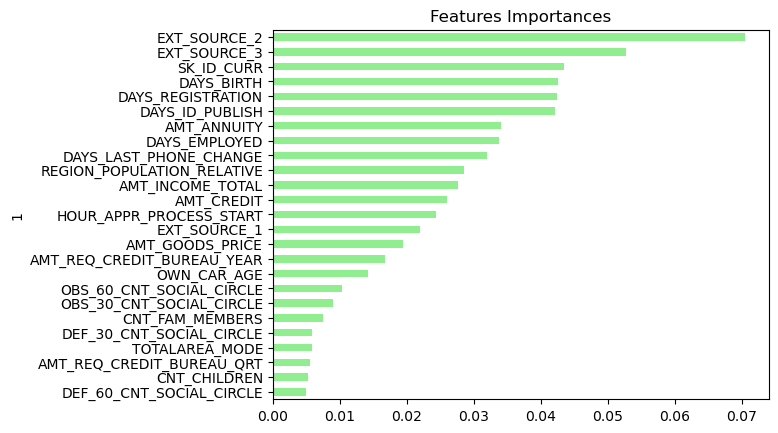

In [18]:
sorted_df.set_index(sorted_df[1], inplace=True)
sorted_df.drop(columns=1, inplace=True)
sorted_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = sorted_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.045514 to fit



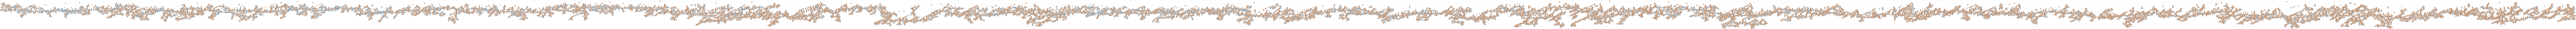

In [19]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [20]:
# # When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# # Saving the tree as PDF
# file_path = "../Resources/transactions_tree.pdf"
# graph.write_pdf(file_path)

# # Saving the tree as PNG
# file_path = "../Resources/transactions_tree.png"
# graph.write_png(file_path)


## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

 * **Sample Answer:** After observing the results, the accuracy seems to be good enought to start exploring this kind of algorithms in a bank, however, I would prefer to start running a pilot with new data to assess model's reliability.